In [1]:

# this will help in making the Python code more structured automatically
%load_ext nb_black
from sklearn import datasets
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)


<IPython.core.display.Javascript object>

In [2]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(name, model,train_x_data,train_y_data,val_x_data,val_y_data):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    #print(f"Model '{name}' performance \n\n")

    predictors_train = train_x_data
    target_train = train_y_data

    predictors_test = val_x_data
    target_test = val_y_data

    # predicting training data using the independent variables
    pred_train = model.predict(predictors_train)

    acc_train = accuracy_score(target_train, pred_train)  # to compute Accuracy
    recall_train = recall_score(target_train, pred_train)  # to compute Recall
    precision_train = precision_score(target_train, pred_train)  # to compute Precision
    f1_train = f1_score(target_train, pred_train)  # to compute F1-score
    roc_train = roc_auc_score(target_train, pred_train)  # to compute ROC AUC

    # predicting test data using the independent variables
    pred_test = model.predict(predictors_test)

    acc_test = accuracy_score(target_test, pred_test)  # to compute Accuracy
    recall_test = recall_score(target_test, pred_test)  # to compute Recall
    precision_test = precision_score(target_test, pred_test)  # to compute Precision
    f1_test = f1_score(target_test, pred_test)  # to compute F1-score
    roc_test = roc_auc_score(target_test, pred_test)  # to compute ROC AUC

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        [
            {
                "Model": name,
                "Data":"Training",
                "Data Shape":train_x_data.shape,
                "Recall": np.round_(recall_train * 100, decimals=3),
                "F1-Score": np.round_(f1_train * 100, decimals=3),
                "Accuracy": np.round_(acc_train * 100, decimals=3),
                "Precision": np.round_(precision_train * 100, decimals=3),
                "ROC-AUC": np.round_(roc_train * 100, decimals=3),
            },{  "Model": name,
                "Data":"Validation/Test",
                "Data Shape":val_x_data.shape,
                "Recall": np.round_(recall_test * 100, decimals=3),
                "F1-Score": np.round_(f1_test * 100, decimals=3),
                "Accuracy": np.round_(acc_test * 100, decimals=3),
                "Precision": np.round_(precision_test * 100, decimals=3),
                "ROC-AUC": np.round_(roc_test * 100, decimals=3),
            },
        ]
    )
    return df_perf

def confusion_matrix_classification(name, model,train_x_data,train_y_data,val_x_data,val_y_data):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    sns.set_context(
        "paper", rc={"font.size": 14, "axes.titlesize": 14, "axes.labelsize": 14}
    )
    print(f"Model '{name}' confusion matrix \n\n")

    predictors_train = train_x_data
    target_train = train_y_data

    predictors_test = val_x_data
    target_test = val_y_data
    #predictors_output = test_y_data.copy()

    y_pred_train = model.predict(predictors_train)
    y_pred_test = model.predict(predictors_test)

    cm_train = confusion_matrix(target_train, y_pred_train)
    cm_test = confusion_matrix(target_test, y_pred_test)

    #predictors_output['Orig'] = target_test
    #predictors_output['Model'] = y_pred_test

    plt.rcParams["figure.figsize"] = [12, 6]
    plt.rcParams["figure.autolayout"] = True

    f, axes = plt.subplots(1, 2)

    labels = np.asarray(
        [
            [
                "{0:0.0f}".format(item)
                + "\n{0:.2%}".format(item / cm_train.flatten().sum())
            ]
            for item in cm_train.flatten()
        ]
    ).reshape(2, 2)

    labels_test = np.asarray(
        [
            [
                "{0:0.0f}".format(item)
                + "\n{0:.2%}".format(item / cm_test.flatten().sum())
            ]
            for item in cm_test.flatten()
        ]
    ).reshape(2, 2)

    g = sns.heatmap(cm_train, annot=labels, fmt="", ax=axes[0])
    g.set(xlabel="True label", ylabel="Predicted label", title="Training Data")

    g1 = sns.heatmap(cm_test, annot=labels_test, fmt="", ax=axes[1])
    g1.set(xlabel="True label", ylabel="Predicted label", title="Validation/Test Data")




<IPython.core.display.Javascript object>

In [3]:
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

<IPython.core.display.Javascript object>

In [4]:
# reading csv data given from bank and load to data frame
bank_data = pd.read_csv("BankChurners.csv")
# copying orignal data so that when changing data we dont lose original
data1 = bank_data.copy()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

In [5]:
# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


<IPython.core.display.Javascript object>

In [6]:
"""
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

# import some data within sklearn for iris classification
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.pipeline import Pipeline

pipe = Pipeline(
    [
        ("pca", PCA(n_components=2)),
        ("std", StandardScaler()),
        ("Decision_tree", DecisionTreeClassifier()),
    ],
    verbose=True,
)

pipe.fit(X_train, y_train)

print()
print("Training set score: " + str(pipe.score(X_train, y_train)))
print("Test set score: " + str(pipe.score(X_test, y_test)))

"""

'\nfrom sklearn import datasets\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.decomposition import PCA\nfrom sklearn.tree import DecisionTreeClassifier\n\n# import some data within sklearn for iris classification\niris = datasets.load_iris()\nX = iris.data\ny = iris.target\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)\n\nfrom sklearn.pipeline import Pipeline\n\npipe = Pipeline(\n    [\n        ("pca", PCA(n_components=2)),\n        ("std", StandardScaler()),\n        ("Decision_tree", DecisionTreeClassifier()),\n    ],\n    verbose=True,\n)\n\npipe.fit(X_train, y_train)\n\nprint()\nprint("Training set score: " + str(pipe.score(X_train, y_train)))\nprint("Test set score: " + str(pipe.score(X_test, y_test)))\n\n'

<IPython.core.display.Javascript object>

In [7]:
cols_reqd_X = [
    "Customer_Age",
    "Gender",
    "Dependent_count",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Total_Trans_Amt",
]


replaceStruct = {"Attrition_Flag": {"Existing Customer": 0, "Attrited Customer": 1}}

# Separating target variable and other variables
X = data1[cols_reqd_X]
Y = data1["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})


# import some data within sklearn for iris classification
# iris = datasets.load_iris()
# X = iris.data
# Y = iris.target

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 16) (3039, 16)


<IPython.core.display.Javascript object>

In [8]:
y_train.value_counts(normalize=True)

0    0.839306
1    0.160694
Name: Attrition_Flag, dtype: float64

<IPython.core.display.Javascript object>

In [9]:
y_test.value_counts(normalize=True)

0    0.839421
1    0.160579
Name: Attrition_Flag, dtype: float64

<IPython.core.display.Javascript object>

In [10]:
def log_transform(x):
    print(x)
    return np.log(x + 1)


scaler = StandardScaler()
transformer = FunctionTransformer(log_transform)

# X_train_log = transformer.fit_transform(X_train, log_transform_features)
# X_train_log.shape

<IPython.core.display.Javascript object>

In [11]:
# For Log Transform
def log_transform(x):
    return np.log(x + 1)


# Collect all Numerical Columns that needs imputation

numerical_features = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Total_Revolving_Bal",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Credit_Limit",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]


log_transform_features = [
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Total_Trans_Amt",
]

# Collect all Categorical Columns that needs imputation
categorical_features = [
    "Education_Level",
    "Gender",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]


# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

# creating a transformer for numerical variables with data skewness Log Transformation
numeric_log_transformer = Pipeline(steps=[("log", FunctionTransformer(log_transform))])

# creating a transformer for categorical variables, which will first apply simple imputer and
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data


# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("log", numeric_log_transformer, log_transform_features),
        ("cat", categorical_transformer, categorical_features),
    ],
)

<IPython.core.display.Javascript object>

In [12]:
# Model Based on Parameters based on hypertuning performance
gbc_tuned = GradientBoostingClassifier(
    random_state=1, subsample=1.0, n_estimators=100, max_depth=5, learning_rate=0.1
)

<IPython.core.display.Javascript object>

In [13]:
# Creating new pipeline with best parameters
final_pipeline_model = Pipeline(
    steps=[("pre", preprocessor), ("GBC-Tuned", gbc_tuned)], verbose=True
)

# Fit the model on training data
final_pipeline_model.fit(X_train, y_train)

[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing GBC-Tuned, total=   2.7s


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Total_Revolving_Bal',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Credit_Limit',
                                                   'Total_Ct_Chng_Q4_Q1',
               

<IPython.core.display.Javascript object>

In [14]:
"""
y_train_pred = final_pipeline_model.predict(X_train)
y_test_pred = final_pipeline_model.predict(X_test)


print(f"Recall Score Train : {recall_score(y_train,y_train_pred,average='weighted')}, Test {recall_score(y_test,y_test_pred,average='weighted')}");
print(f"Accuracy Score Train : {accuracy_score(y_train,y_train_pred)}, Test {accuracy_score(y_test,y_test_pred)}");
print(f"F1 Score Train : {f1_score(y_train,y_train_pred,average='weighted')}, Test {f1_score(y_test,y_test_pred,average='weighted')}");
print(f"Precision Score Train : {precision_score(y_train,y_train_pred,average='weighted')}, Test {precision_score(y_test,y_test_pred,average='weighted')}");

"""

'\ny_train_pred = final_pipeline_model.predict(X_train)\ny_test_pred = final_pipeline_model.predict(X_test)\n\n\nprint(f"Recall Score Train : {recall_score(y_train,y_train_pred,average=\'weighted\')}, Test {recall_score(y_test,y_test_pred,average=\'weighted\')}");\nprint(f"Accuracy Score Train : {accuracy_score(y_train,y_train_pred)}, Test {accuracy_score(y_test,y_test_pred)}");\nprint(f"F1 Score Train : {f1_score(y_train,y_train_pred,average=\'weighted\')}, Test {f1_score(y_test,y_test_pred,average=\'weighted\')}");\nprint(f"Precision Score Train : {precision_score(y_train,y_train_pred,average=\'weighted\')}, Test {precision_score(y_test,y_test_pred,average=\'weighted\')}");\n\n'

<IPython.core.display.Javascript object>

,Model,Data,Data Shape,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,PipeLine Model - Train & Test,Training,"(7088, 16)",94.996,96.092,98.758,97.215,97.237
1,PipeLine Model - Train & Test,Validation/Test,"(3039, 16)",84.016,87.701,96.216,91.723,91.283


Model 'PipeLine Model - Train & Test' confusion matrix 




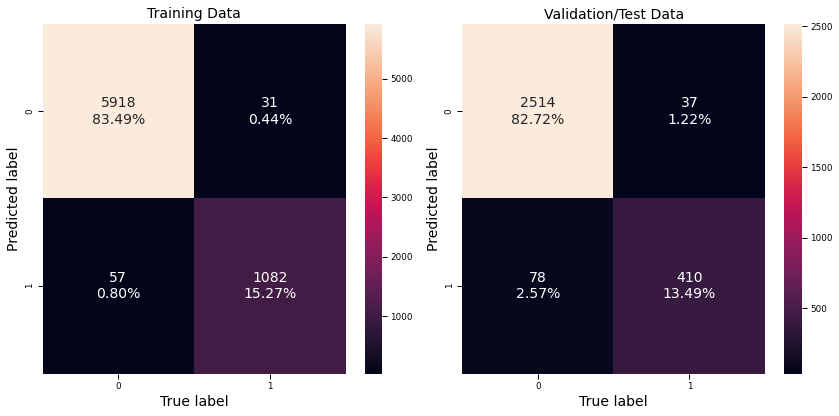

<IPython.core.display.Javascript object>

In [16]:
display(
    model_performance_classification(
        "PipeLine Model - Train & Test",
        final_pipeline_model,
        X_train,
        y_train,
        X_test,
        y_test,
    )
)


confusion_matrix_classification(
    "PipeLine Model - Train & Test",
    final_pipeline_model,
    X_train,
    y_train,
    X_test,
    y_test,
)

### Feature importance - Gradient Boosting Tuned Model